# **Neural Networks 101** - Keras edition

Neural Networks are a very hot topic these days. Here I present an introduction with a practical example implemented in [Keras](https://keras.io/), a python deep learning library.

In [1]:
# Loading useful stuff.
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Plot style
plt.style.use('mystyle.mplstyle')

## Our very realistic problem
Imagine we are part of the ABC, the Amazing Bingo Club. This year it's the 100th anniversary of the club and a big event is coming in. We will have the biggest [bingo](https://en.wikipedia.org/wiki/Bingo_%28U.S.%29) game the ABC has ever seen, for all the 29 members will be present! Moreover, we want to honor our founder Margaret and let her draw and call the numbers. But there is a problem. Margaret is blind.

Fear not! We have a potential solution. One of the members of the club has a KVN, from the [Final Space](https://en.wikipedia.org/wiki/Final_Space) universe. Meet KVN:

![KVN](figs/KVN.png)

KVN is a robot usually employed as a Deep Space Insanity Avoidance Companion. Nonetheless, we want to use it to read the numbers that Margaret draws and whisper them to her so she can then call the numbers aloud. The problem is that KVN doesn't have a number recognition system implemented. That is, KVN can see but he is not able to recognize numbers... The good news are that we have access to KVN's main system, so if we are skilled enough, we could implement a digit recognizer into him.

But the bad thing is that there is another problem (and we hope it to be the last). The ABC is in really low budget so the numbers that Margaret will draw are handwritten numbers in small pieces of paper. Thus, we cannot just make KVN recognize some standard digits. Moreover, in the 100 years of the club, some numbers have been lost and replaced by many different members. So, in the end, we have a lot of different number styles within our bingo set.

In summary, then, we want KVN to be able to read handwritten digits similar to the ones below and whisper to Margaret:

*It's a 2...*

![digit_examples](figs/digit_examples.png)

The first question is: how do we do it?

Well, one might think in the possibility to hardcode some rules to identify numbers such as the 2's have a semicircle on top, probably a loop on the bottom left, etc... As one can already divise, this is a ton of work for not very promising results and it is also not straightforward how to define such rules.

But what if we could show KVN a lot of examples of numbers so he can create his own rules to recognize them? What if we could do something like...

\-  **Us:** Look KVN, this is a 2, this is also a 2, this is a 1, this is an 8, this is also an 8, etc.

\-  **Us:** \**Showing him a new 2*\* What is this?

\-  **KVN:** A 2!!!!

Here is when Neural Networks (NN) enter the game. NNs are a tool that will allow KVN to learn to recognize digits as described above.

*Disclaimer: What we are talking here is supervised learning of image classification, in the sense that we have labeled examples to teach KVN (e.g. images of 2 that we know are a 2) and the goal is to identify which number the image represents. NNs are used in a myriad of problems, not solely in supervised learning nor image classification.*

## First things first

When we talk about *neural networks*, we are actually talking about artifical neural networks (ANNs). ANNs are vaguely inspired by the biological neural networks (BNNs). BNNs or neural circuits are groups of interconnected neurons, a type of cell of the nervous system (including the brain).

### Neurons
These cells called **neurons** constitute a great part of our brain. Here a neuron (from [Wikipedia](https://en.wikipedia.org/wiki/Neuron)):

![neuron](figs/neuron.png)

Their function, extremely simplified, is to transmit information. The way they work is the following:

1. A neuron receives a series of **inputs** from other neurons.
2. If the *sum* of these inputs is above a certain **threshold**, the neuron triggers and emits an **output** (that will go to other neurons).

More or less, we have **100 billion** of these in our brain, which is A LOT. In principle, thanks to them we are able to sense and think but we will not delve deep into this.

The main idea we are interested in is: if we can learn with our brains which are constituted by neurons which are heavily interconnected... can we program *artificial neurons*, interconnect them and obtain an *artificial brain* that does something similar? Well, this is exactly what ANNs (NNs from now on) try to do.

#### Artifical neurons

In order to mimic the behaviour of neurons, artifical neurons are usually modeled as follows (image [source](https://sausheong.github.io/posts/how-to-build-a-simple-artificial-neural-network-with-go/)):

![artifical_neuron](figs/artifical_neuron.png)

As we can see, these neurons have a series of **inputs** $i_i$, a **weight** $w_i$ associated with each input, an **activation function** $\sigma$ and an **output** $o$.

This might seem a bit obscure so let's try to clarify it a bit. The typical example used to explain artificial neurons is the following: Imagine there is a concert of our favourite group on Saturday and we want to decide whether or not to attend it. In order to take this decision, we consider several factors:

- Will someone come with me?
- Will it be good weather?
- Can I go there by public transportation?

To all these questions, which are my inputs $i_i$, affirmative answers (i.e. $1$) are good. But are they equally important? It might be the case that I don't really care if I have to go alone but I cannot withstand bad weather. How do I represent this? The weights $w_i$ are exactly for that. Bigger $w_i$ means bigger importance. Then, the activation function $\sigma$ is my *decision function*. A very simple function would be:

$$ o = \sigma(i) = 
\begin{cases}
    1,& \text{if } \sum_i w_i i_i \gt threshold\\
    0 ,& \text{if } \sum_i w_i i_i \lt threshold
\end{cases}
$$

That is, if the **weighted input** $\sum_i w_i i_i$ is greater than a **threshold**, the output $o$ will be $o=1$, I will go to the concert. In other words, only when the conditions I am considering to go to the concert are good enough for me I will attend the event.

In the neuron model, we can see that we have $\Sigma | \sigma$. This is because the illustrative case is to use as an activation function the one explained above, which is simply the sum $\Sigma$ of the weighted inputs. But in general, the activation function used are a little bit more complicated than that. A general expression for these artificial neurons is:

$$ o = \sigma \big( \sum_i w_i i_i + b \big) $$

Notice that a $b$, called **bias**, has appeared. This is equivalent to the threshold we were talking before, just a little rearranged. It can be thought as *how difficult* is to trigger the neuron.

There are many activation functions. The most popular are the following:

- **Sigmoid function**:

$$ \sigma(x) = \frac{1}{1+e^{-x}} $$

- **Tanh function**:

$$ \sigma(x) = \tanh (x) $$

- **Rectifier function** (sometimes called ReLU):

$$ \sigma(x) = \max(0,x) $$

And their shape:

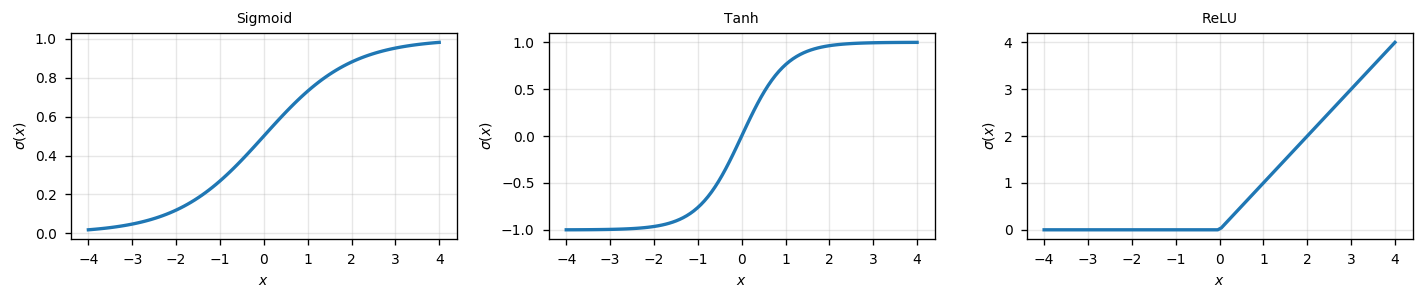

In [3]:
# Define x grid.
xx = np.linspace(-4,4,100)

# Define response from the different activation functions.
y_sig = 1/(1+np.exp(-xx))
y_tanh = np.tanh(xx)
y_relu = [max(0,x) for x in xx]

# Plot the activation functions.
plt.figure(figsize=(12,2.6))

# Sigmoid
ax1 = plt.subplot(131)
ax1.plot(xx,y_sig)
ax1.set_title("Sigmoid")
ax1.set_xlabel("$x$")
ax1.set_ylabel("$\sigma(x)$")
ax1.grid(alpha=0.3)

# Tanh
ax2 = plt.subplot(132)
ax2.plot(xx,y_tanh)
ax2.set_title("Tanh")
ax2.set_xlabel("$x$")
ax2.set_ylabel("$\sigma(x)$")
ax2.grid(alpha=0.3)

# ReLU
ax3 = plt.subplot(133)
ax3.plot(xx,y_relu)
ax3.set_title("ReLU")
ax3.set_xlabel("$x$")
ax3.set_ylabel("$\sigma(x)$")
ax3.grid(alpha=0.3)

plt.tight_layout()

### Neural networks
Now that we have our neurons, we can build our neural networks by interconnecting them. This would be a simple of example of such network (image [source](https://sausheong.github.io/posts/how-to-build-a-simple-artificial-neural-network-with-go/)):

![neural_net](figs/neural_net.png)

This seems a bit more complicated but it's actually the same idea with more neurons. The **input layer** is basically a representation of the input values (there are no neurons in the input layer). The **output layer** are the artifical neurons which produce the final outputs. The **hidden layer**, basically a layer which is not an input nor an output, is constituted by several neurons. Each neuron has its inputs, its outputs and its activation function. If we talk about parameters, each neuron has a set of weights $w$ (one for each input $i$ it receives) and a bias $b$. We can already see that for this very little example we already have a lot of parameters. This will be important later on.

This small *"brain"* works as following: there are a series of inputs that go to the hidden layer, each neuron in this layer produces an output that becomes an input for the next layer (the output layer in this case) and finally, the output layer neurons produce the final outputs.

Returning to our original problem, we want to implement one of this neural networks inside KVN such that when we give him an image of a number as an input, he will then whisper which number it is as an output.

*Disclaimer: This example is what it is called a feedforward neural network. In these networks, there are no cycles. All information always goes forward from input to output. There are other types of neural networks with different properties, such as recurrent neural networks, but they are more complicated so we will stick to the "easy" case.*

## Learning time!
Now we have an idea of what the new system we want to implement to KVN will look like. The problem is we need to be able to train this system. That is, we need a method for KVN to learn to identify the numbers using this system.

In more mathematical terms, learning means finding the optimal parameter set $w, b$ such that, at the end, KVN gets the digit right the maximum possible number of times. This is actually a big optimization problem and the concepts used in smaller problems hold.

The main idea required so that KVN can learn is that he needs to understand when he is wrong and how wrong he is. Once this is defined, he can learn to be less wrong the next time he tries (i.e. the parameters can be optimized). Ideally, if he tries a lot of times, he will eventually be as right as he can be with the particular system we design for him.

### Wrongness meter
So, how can we define how wrong is KVN? The idea is to define what it is called a **loss function** or **cost function** $C$. This function must represent the distance between the truth (i.e. the correct digit) and the system's output (i.e. KVN's guess). That is, how wrong is KVN.

The two natural conditions that this function has to fulfill is that it has to depend on the output (otherwise it wouldn't make sense) and it has to be strictly positive (we will see in a moment why). Again, as in the activation function case, there are many different cost functions with different properties (but we won't enter into more detail here). Two of the most popular cost functions are:

- The **quadratic cost function**:

$$ C(w,b) = \frac{1}{2n} \sum_i \| o(i) - a(i)\|^2 $$

This function represent the mean quadratic distance over all inputs $i$ (all images to learn) between the output corresponding to the input (guess of each image) and the correct answer $a$. It solely depends on the system parameters $w, b$. $n$ is the total number of inputs. This is the traditionally used cost function in optimization (or regression) problems.

- The **cross entropy cost function**:

$$ C(w,b) = -\frac{1}{n} \sum_i [o\ln{a}+ (1-o)\ln{(1-a)}] $$

Notice that in this case, abusing notation, $a,o$ are equivalent to $a(i), o(i)$. This function is designed to solve some of the limitations of the quadratic cost function.

Now that KVN have a wrongness meter, how can we he use it to learn anything?

### The downhill bike
The typical method to solve optimization problems is what it is called **gradient descent**. This might sound quite complicated but the main idea is rather simple. To illustrate, let's define an arbitrary cost function that depends only on a single variable $x$. The situation is the following:

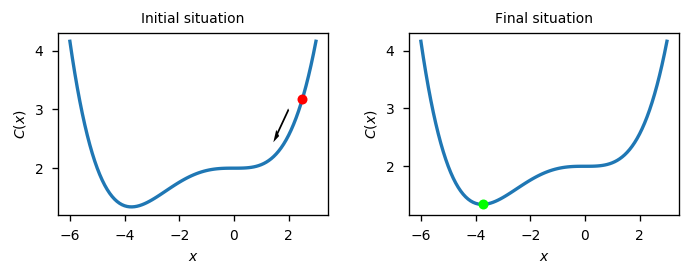

In [4]:
# Define x grid.
xx = np.linspace(-6,3,100)

# Arbitrary cost function.
def fun(x):
    return 0.01*x**4 + 0.05*x**3 + 2

# Compute function shape.
y = fun(xx)

fig = plt.figure(figsize=(6,2.4))

# Initial situation
ax1 = plt.subplot(121)
ax1.plot(xx, y, zorder=-1)
ax1.scatter(2.5, fun(2.5), color='r')
ax1.arrow(2,3,-0.4,-0.4, width = 0.05, color='k')
ax1.set_title("Initial situation")
ax1.set_xlabel("$x$")
ax1.set_ylabel("$C(x)$")

# Final situation
ax2 = plt.subplot(122)
ax2.plot(xx, y, zorder=-1)
ax2.scatter(xx[np.argmin(y)], min(y), color='lime')
ax2.set_title("Final situation")
ax2.set_xlabel("$x$")
ax2.set_ylabel("$C(x)$");

plt.tight_layout()

The idea behind gradient descent is quite simple. Imagine that initially the KVN's system is quite wrong and we start in the leftmost situation. We compute the cost function and it happens that we are far away from the minimum, which represents the least possible error we can have with our system that is why we needed a positive function). Qualitatively, we would like to *go downhill* until we reach the minimum of the cost function, as in the leftmost plot. Following this explanation, we can imagine gradient descent as *downhill biking*. from the least possible error (that is why we needed a positive function). 

Nonetheless, there is no easy way to know if we are at the very minimum. What we can do is look at our hill and see if we are in a slope. If that is the case, we ride our bike to go a little bit downhill to check again. If we repeat this procedure a lot of times, we will end up, ideally, in the rightmost situation: we are in the minimum (i.e. KVN gets it right the maximum number of times the system allows him) so the system is optimized.

Mathematically, the slope is the derivative of the cost function with respect to the parameter set evaluated at the current parameter set. Therefore, the idea behind gradient descent is that we iteratively compute the derivative and update our parameter set such that we get closer to the minimum. Hopefully, in the end, we will reach the global minimum. The expression used for this update is:

$$ v \rightarrow v' = v - \eta \nabla C$$

Here, $v$ is the parameter set $w, b$ of the system. $\eta$ is what it is called the **learning rate** which is equivalent to how long are our rides with the bycicle between slope checks. If it is too small, we will never reach the valley. If it is too big, we will end up going from one side to the other without reaching the minimum. The $\nabla C$ is the **gradient of the cost function**, which is equivalent to the slope of the mountain. There is a $-$ sign because we always want to go down. Remember that we are downhill biking!

The next question one might ask is:

*Okay... but how exactly do you determine the slope of a mountain with a hell lot of dimensions?!*

Remember that we have a lot of parameters and each parameter corresponds to a dimension. Thus, we have as many dimensions as parameters. The example above have only one dimension. Thus, this is a totally valid question. How would you know where *down* is if you were in a world that has 1000 dimensions? (Our world have three spatial dimensions).

As we have seen, the slope corresponds to the gradient. In computational sciences, gradients are usually computed by what is called **finite differences**. We won't discuss that here but the idea is that it requires to compute what happens to the cost function if we vary by a small amount a single parameter. And repeat for all parameters. This means that in order to determine the slope at every check, we have to compute the cost function as many times as parameters we have (a lot). And remember that in order to evaluate the cost functions we saw above we have to evaluate all training examples. Although this works, it is extremely slow. And by extremely I mean prohibitively slow. In our biking situation, night would fall upon us and no one wants to bike at night, for night is dark and full of terrors.

One way to speed things up is what is called **stochastic gradient descent**. The idea is that instead of using *all* input examples at each step, we use a random subsample of them, a *mini-batch* at each slope check. Then, the cost function is computed for this subsample and used to determine the slope. In the next check, a different subsample is used. This procedure is repeated until all training samples have been used which is said to complete an *epoch* of training. After each epoch, the procedure is started again. 

Using this method, we only get an idea of where down is at each check, but an idea is sufficient to advance a bit. That way, KVN only has to look at a fraction of the images to learn a bit and is faster in dismounting, checking and riding the bike again. The path that KVN will follow with stochastic gradient descent will be less direct but the ride will also be much faster. Altough this method can improve the speed, the slope check is still too slow.

### The slopemeter

The method usually used to compute the slope is the **backpropagation algorithm**. The idea is that using the chain rule of basic calculus, we can compute which effect a small perturbation of a parameter will have in the final cost function. These effects are actually the derivatives we were talking before, so what we are saying is that we use the chain rule to obtain simple forms to compute the derivatives. The name backpropagation comes from the fact that the algorithm starts at the output, and from the error in the cost function backpropagates through the network computing these perturbations and thus, obtaining the derivatives.

In the end, this means that each slope check, the network has to be used once per training sample (or image) in the mini-batch in the forward direction to compute the cost function and once per sample in the backward direction to compute the gradient (or slope). In the end, this method is much much faster than finite differences and allow neural networks to be really feasible.

People, we have finally revised all the building blocks required to understand the system we intend to implement into KVN for him to recognize the bingo digits. Time to get the job done!

## KVN and bingo

Now it is time to start building the system we want to implement into KVN! To do so, we will use the **Keras** python library. This library is specially designed to ease the creation and implementation of neural networks. Most of the things discussed above are already implemented in the library's methods. Let's load everything we will need.

In [5]:
import os
os.environ['KERAS_BACKEND'] = 'theano'

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers
from keras import regularizers
from keras.utils import np_utils

Using Theano backend.


### Load the data
First of all, we need some examples for KVN to learn. Recall that we intend to make KVN learn by showing him digit such examples. The set of examples used for learning are called the **training set**. Moreover, we also need some other examples that we can show KVN to evaluate him before the big night. These examples are called the **test set**.

Therefore, we need images of handwritten digits that we can show KVN so he can start learning. There is an extensively used public dataset called the [MNIST](http://yann.lecun.com/exdb/mnist/) database of handwritten digits. This dataset contains a training set of 60000 examples and a test set of 10000 examples. Luckily for us, this dataset is already implemented in the Keras library so we can directly use it!

In [6]:
# Load the MNIST dataset, split between the training set and the test set.
# X correspond to inputs (i.e. images).
# y correspond to outputs (i.e. digits).
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


As we can see, the training input set *X_train* contains 60000 greyscale images of size 28x28 px. The training label set *y_train* contains 60000 labels corresponding to each image. Let's look at some of the samples:

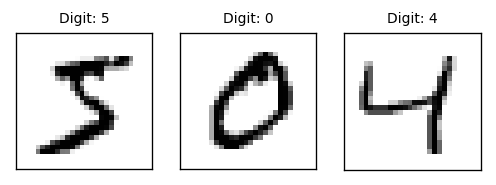

In [7]:
# Plot some MNIST examples.
plt.figure(figsize=(5,1.7))
for i in range(3):
    plt.subplot(131+i)
    plt.imshow(X_train[i], cmap='gray_r')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

### Format the data

As expected, this images are just what we need for KVN to learn to assist Margaret! Now, in order to use the images in the Keras implementation of the system, they have to be formatted in a particular manner (defined by the Keras library)::
- Each pixel value goes from 0 to 255, but inputs need to be between 0 and 1. 
- The inputs must be vectors, not matrices.

    28x28 -> 784x1
    
- Categories have to encoded in binary vectors. That is

    0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]  
    1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]   
    2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]  
    etc
    
There are ten categories which correspond to digits from $0$ to $9$.

In [8]:
# Format the data shape.
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# Change data type.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize inputs to 0-1 interval.
X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [9]:
# Save original category encoding (0,1,2,...).
y_train0 = 1*y_train
y_test0 = 1*y_test

# Change category encoding.
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

### Build the neural network
Now that we have the data, we need to **build** the system that we will implement to KVN, we need to build the neural network! So far, the only network that we have seen had one (dummy) input layer, one hidden layer and one output layer. There are different types of layers. The one that is fully connected to the previous and the next layer (as the ones we have seen) is called **Dense** in Keras. For now, we will stick to this simple **architechture** (i.e. network structure) and see if it works. That is, our neural network will be constituted by:

1. An input layer with $784$ inputs (one per pixel).

2. A hidden Dense layer with $n=30$ neurons.

    - Activation function: Sigmoid
    
    
3. An output Dense layer with $n=10$ neurons.

    - Activation function: Sigmoid
    
The choice of $n=30$ neurons in the hidden layer is rather arbitrary. Nonetheless, the number of neurons on the output layer is directly related to the number of categories we want for KVN to learn. Since we have $10$ categories (digits), we need $10$ neurons. The idea is that KVN's guess will be related to the neuron that has the higher activation. If the neuron corresponding to the digit 3 is the one with the higher activation, KVN is saying: *"A 3!"*.

Keras allows us to build our neural network in a very intuitive way. We generate what is called a *Sequential* model that basically lets us to add layers sequentially. When we add layers, there are ways to initialize the weights and biases (i.e. the parameter set) with different distributions. Nonetheless, we won't focus on this. Just say that the initialization can influence the learning procedure. This makes sense since the initialization determines where in the mountain we start our downhill!

Enough chit chat, let's build KVN's system!

In [10]:
# Define KVN's system.
kvn = Sequential()

# Add the hidden layer, a Dense layer with 30 neurons.
# The first layer also requires specification of input dimensions.
kvn.add(Dense(30, input_shape=(784,)))

# Define the activation function of the neurons in the last layer added.
kvn.add(Activation('sigmoid'))

# Add the output layer, a Dense layer with 10 neurons (1 neuron per category).
kvn.add(Dense(10))

# Define the activation function of the output layer.
kvn.add(Activation('sigmoid'))

# Save the initial weights and biases
kvn.save_weights('kvn_init_weights.h5')

### Insert system into KVN
Now that we have defined our system, we plug it into KVN. In actual terms, what we **compiling** the model but we won't talk much about that. The only thing that we need to know is that we need to specify which loss function and which optimizer we want to use in the system and which metrics we want to get.

In [11]:
# Define our optimizer: stochastic gradient descent.
lr = 3.0                    # learning rate.
sgd = optimizers.SGD(lr=lr) # the optimizer.

# Compile the model.
kvn.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

### KVN, learn!
Now that we have plugged the system into KVN it is time to start showing him the images of the numbers. 60000 of them. This phase is usually called the model **fit** because we are fitting all parameters to minimize the cost function. The **validation set** specified here answers to a similar idea as the test set. We have a set of examples to validate how KVN's is doing during the learning phase. We could have a validation set *and* a test set (which would be used only at the end) but for the purposes of this work it is not required.

Let's learn!

In [12]:
batch_size = 10 # Number of training examples in each mini-batch.
epochs = 30     # Number of epochs.

# Fit the model and store information in history.
history = kvn.fit(X_train, y_train, verbose=0, 
                  batch_size=batch_size, epochs=epochs, 
                  validation_data=(X_test, y_test))

### KVN, test time!
After this training session, KVN should have learned something. Now we want to see what has he learnt. To do so, let's evaluate KVN. Let's show him the test images (which he didn't use to learn although we already used them to see how he was doing) and see how good is he at identifying the digit present.

In [13]:
# Evaluate the performance of the system with the test set.
scores = kvn.evaluate(X_test, y_test, verbose=0)

# Scores contain the specified metrics.
print("Test loss:", scores[0])     # Loss function by default.
print("Test accuracy:", scores[1]) # Accuracy as asked.

Test loss: 0.006632170011440758
Test accuracy: 0.9636


Damn, KVN! This is a remarkably good result! An accuracy of over $0.96$ means that KVN got the digit right more than $96 \%$ of the time. This is quite a feature!

Let's check some of the KVN's good guesses and some of the KVN's bad guesses to get a flavor of what he has learned.

In [14]:
# The predict_classes function gives us KVN's digit guess.
# in the original class encoding
predicted_classes = kvn.predict_classes(X_test)

# Check which are the good guesses and the bad guesses.
correct_indices = np.nonzero(predicted_classes == y_test0)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test0)[0]

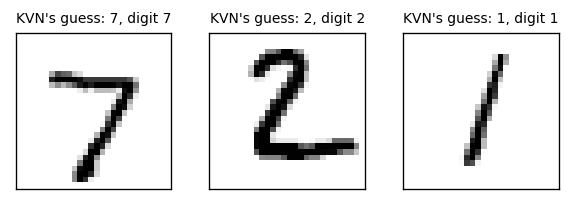

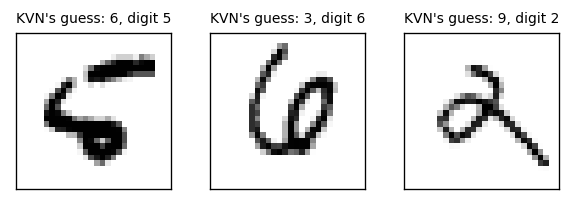

In [15]:
# And see some examples.
# Good guesses (predictions).
plt.figure(figsize=(5,1.7))
for i, correct in enumerate(correct_indices[:3]):
    plt.subplot(131+i)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray_r')
    plt.title("KVN's guess: {}, digit {}".format(predicted_classes[correct],
                                                 y_test0[correct]))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
    
# Bad guesses (predictions).
plt.figure(figsize=(5,1.7))  
for i, incorrect in enumerate(incorrect_indices[:3]):
    plt.subplot(131+i)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray_r')
    plt.title("KVN's guess: {}, digit {}".format(predicted_classes[incorrect],
                                                 y_test0[incorrect]))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

Well, as we can see above, KVN got trouble learning to identify digits of rather poor handwritting but correctly identified more standard ones. So, for now, I think we can say that KVN did a good job!

Okay okay, good compared to what? The most trivial system would be to randomly pick a class. That is, that when we show KVN an image he randomly says a digit. In that case, he will be right, on average, $10 \%$ of the time (because we have $10$ classes). So our system is quite better than the random system! Nonetheless, *how good is the accuracy* heavily depends on the problem. If we were trying to identify if a patient has cancer, for instance, this accuracy might still be too low. For the case at hand, that accuracy will absolutely do for good old Margaret.

KVN got a cookie!

![kvn_cookie](figs/kvn_cookie.jpg)

## Did we get lucky?

As you might have realized, I made some *arbitrary* choices regarding some of the parameters such as the learning rate or the number of neurons in the hidden layer. Will KVN always perform that good independently of the choices we make? The short answer is no. As an illustrative example, let's try what happens if we change the learning rate at which KVN learns.

In [16]:
batch_size = 10 # Number of training examples in each mini-batch.
epochs = 30     # Number of epochs.

# Faster case.
# Recover initial weights (when nothing was learned).
kvn.load_weights('kvn_init_weights.h5')

lr = 100.0 # Big learning rate.
sgd = optimizers.SGD(lr=lr)
kvn.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
history_fast = kvn.fit(X_train, y_train, verbose=0, 
                       batch_size=batch_size, epochs=epochs, 
                       validation_data=(X_test, y_test))

# Slower case.
# Recover initial weights (when nothing was learned).
kvn.load_weights('kvn_init_weights.h5')

lr = 0.001 # Small learning rate.
sgd = optimizers.SGD(lr=lr)
kvn.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
history_slow = kvn.fit(X_train, y_train, verbose=0, 
                       batch_size=batch_size, epochs=epochs, 
                       validation_data=(X_test, y_test))

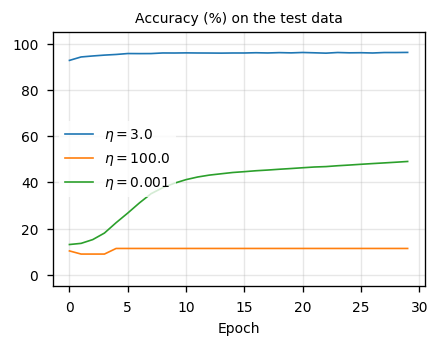

In [17]:
# Plot accuracy on test data for the different learning rates.
# Map from 0-1 interval to 0-100% interval.
val_acc = 100*np.array(history.history['val_acc'])
val_acc_fast = 100*np.array(history_fast.history['val_acc'])
val_acc_slow = 100*np.array(history_slow.history['val_acc'])

plt.plot(val_acc, lw=1, label='$\eta = 3.0$')
plt.plot(val_acc_fast, lw=1, label='$\eta = 100.0$')
plt.plot(val_acc_slow, lw=1, label='$\eta = 0.001$')
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.title('Accuracy (%) on the test data')
plt.xlabel('Epoch')
plt.ylim([-5,105]);

As we can see now, the results for other learning rates are not so promising. For the case with $\eta = 100$, the learning rate is too big and KVN keeps going from one side of the valley to the other with his bike so he is not able to learn much because his rides are too long. He doesn't get closer to the optimal solution. For the case of $\eta = 0.001$, he learns too slow to reach a good accuracy with only $30$ epochs. With more epochs, it would probably reach a good accuracy. He is really slow.

Here, one can start to get a flavour of how hard it might get to pick the right **hyper-parameters**, all parameters that are picked but not learned (e.g. the learning rate, the batch size, the number of epochs, the initialization, the network architecture, etc). Working with neural networks can be daunting sometimes, since, depending on the problem and the architecture, it might take a lot of time to fit the model only to discover a depressing accuracy. Although there are some heuristics on how to tune and look for the right hyper-parameters, it is more of an intuition thing. Of course, there are rigorous parameter exploration methods but they are not always feasible.

## Memorizing is bad

KVN did a good job but we have to also consider that he has at his disposal a ton of examples to learn from. What would happen if we have less examples to teach him? Let's make him learn to assist Margaret with only $1000$ examples! Since we are giving him less examples to learn from, we will give him more time (epochs) to try to learn from them.

In [18]:
# Back to initial state where nothing was learned.
kvn.load_weights('kvn_init_weights.h5')

batch_size = 10 # Number of training examples in each mini-batch
epochs = 400    # Number of epochs
lr = 0.5        # Learning rate

sgd = optimizers.SGD(lr=lr)
kvn.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

# Train with less (1000) examples
history_less = kvn.fit(X_train[:1000], y_train[:1000], verbose=0, 
                       batch_size=batch_size, epochs=epochs, 
                       validation_data=(X_test, y_test))

In [19]:
# Evaluate the performance of the system with the test set.
scores_less = kvn.evaluate(X_test, y_test, verbose=0)

# Scores contain the specified metrics.
print("Test loss:", scores_less[0])     # Loss function by default
print("Test accuracy:", scores_less[1]) # Accuracy as asked

Test loss: 0.019904688995704054
Test accuracy: 0.876


Uoah, KVN did quite worse! This time he gets it wrong roughly $13 \%$ of the time, almost a $10 \%$ more than before! Before discussing this any further, I want you to see something:

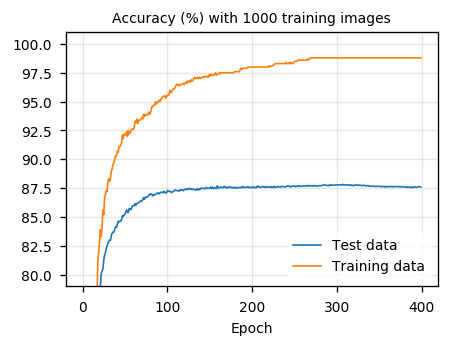

In [20]:
# Plot accuracy evolution during the learning phase.
# Training set of 1000 images.
acc_test = 100*np.array(history_less.history['val_acc'])
acc_train = 100*np.array(history_less.history['acc'])

plt.plot(acc_test, lw=1, label='Test data')
plt.plot(acc_train, lw=1, label='Training data')
plt.legend(loc='best')
plt.ylim([79,101])
plt.grid(alpha=0.3)
plt.xlabel('Epoch')
plt.title('Accuracy (%) with 1000 training images');

Here we can see different things. The most obvious one is that KVN got it right in the training data almost always while his guesses on the test data are quite bad. Moreover, after around epoch $150$, his performance on the test data not only does not improve, but it also decreases slightly. Meanwhile, the accuracy in the training data keeps improving! What is going on KVN?!

Well, what is happening is that KVN is not learning to identify the digits, he is memorizing the images that we gave him to learn! This phenomenon is what it is called **overfitting**. Overfitting happens when the model performs good on the training data but it is not able to generalize properly in new data (i.e. the test data).

To further illustrate what we are talking about, let's repeat the plot above using the complete training set.

In [21]:
# Back to initial state where nothing was learned.
kvn.load_weights('kvn_init_weights.h5')

batch_size = 10 # Number of training examples in each mini-batch.
epochs = 30     # Number of epochs.
lr = 0.5        # Learning rate.

sgd = optimizers.SGD(lr=lr)
kvn.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

# Train with all examples.
history = kvn.fit(X_train, y_train, verbose=0, 
                  batch_size=batch_size, epochs=epochs, 
                  validation_data=(X_test, y_test))

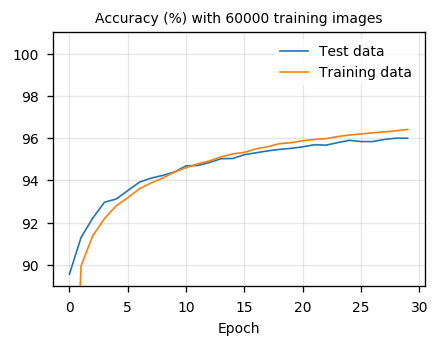

In [22]:
# Plot the accuracy evolution during the learning phase.
# Complete training set.
acc_test = 100*np.array(history.history['val_acc'])
acc_train = 100*np.array(history.history['acc']) 
plt.plot(acc_test, lw=1, label='Test data')
plt.plot(acc_train, lw=1, label='Training data')
plt.legend(loc='best')
plt.ylim([89,101])
plt.grid(alpha=0.3)
plt.xlabel('Epoch')
plt.title('Accuracy (%) with 60000 training images');

What we see here is that the gap between the training and the test accuracies is much much smaller and both accuracies keep improving together over time.

If we do a bit of math, we will discover that our network has $23860$ free parameters between weights and biases. By free parameters I mean parameters that are learned during the training session. These are a lot of parameters to be fitted. If we have much more parameters than samples (training images), it is possible to find a parameter set that perfectly (or almost) identifies our training samples. In this case, since new data will be most certainly different than the one we have, the system performs poorly. Nonetheless, when we have more samples than parameters, the parameters have to be tuned to identify as good as possible all the samples. That way, it performs worse on the training data (it can't be fitted perfectly) but it is more probable that the model is able to better identify new samples.

In general, overfitting is bad. The usual case is that we have some data to train our model so that it can after identify new data. Properly identify new data is what it is called to **generalize**. In our problem, we have a dataset of handwritten digits that we use to train KVN so then he can properly identify the bingo numbers (which were not in the training dataset). KVN needs to understand what each digit looks like so when he sees a new example can properly identify. Playing memory card does not generalize well.

### KVN, do not memorize!

As we have seen, the relation between the number of parameters and the size of the training dataset is what defines whether or not we have overfitting. Then, to solve overfitting we either obtain more data or simplify KVN's system so that it has less parameters.

But what happens if we can't obtain more data nor we can't (or don't want to) simplify our system? Is there a way to avoid (or minimize) overfitting? One way is to *simulate* more data. That is, generate more data from the one we have. In our example, we could do so using rotations or small distortions of the digits. This is called *data augmentation*. But can we make KVN to avoid memorizing as much as possible?

The answer is yes, we can do that by means of what is called **regularization techniques**. One of the most commonly used of such techniques is the one known as **weight decay** or **L2 regularization**. This technique consists in adding a term in the cost function that penalizes bigger weights $w$ in the following way:

$$ C = C_0 + \frac{\lambda}{2n}\sum_w w^2 $$

Here, $C_0$ is the original cost function, the other parameters are the same and $\lambda$ is a parameter that affects the balance between the original cost function and the weight size. When $\lambda$ is small, we prefer to minimize the original cost function, but when $\lambda$ is large we prefer small weights.

The idea behind this regularization is that keeping weights small makes impossible for the weights to point very far in a given direction. If weights can grow unconstraint, it might be the case where they are large in a certain dimension and the small perturbations given by new samples can't change the direction of the weight vector. In plain words, what regularization does is to tell KVN: do not memorize, understand. Then, KVN does what he can.

Let's see what happens when we introduce L2 regularization to the overfitting situtation we had before.

In [23]:
# We need to redefine the system.
kvn = Sequential()

# Add the hidden layer, a Dense layer with 30 neurons
# and L2 weight regularization.
lamb = 0.00005 # lambda parameter
kvn.add(Dense(30, input_shape=(784,),
             kernel_regularizer=regularizers.l2(lamb)))

# Define the activation function of the neurons in the last layer added.
kvn.add(Activation('sigmoid'))

# Add the output layer, a Dense layer with 10 neurons (1 neuron per category)
# and the same L2 weight regularization
kvn.add(Dense(10, kernel_regularizer=regularizers.l2(lamb)))
kvn.add(Activation('sigmoid'))

In [24]:
# Compile and fit with the reduced training set with regularization.
batch_size = 10 # Number of training examples in each mini-batch.
epochs = 400    # Number of epochs.
lr = 0.5        # Learning rate.

sgd = optimizers.SGD(lr=lr)
kvn.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

# Train with 1000 examples
history_reg_less = kvn.fit(X_train[:1000], y_train[:1000], verbose=0, 
                           batch_size=batch_size, epochs=epochs, 
                           validation_data=(X_test, y_test))

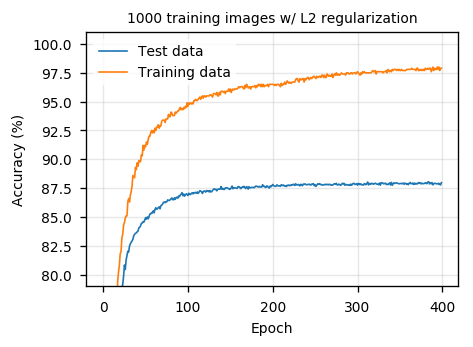

In [25]:
# Plot the accuracy evolution during the learning phase..
# Training set of 1000 images with L2 regularization.
acc_test = 100*np.array(history_reg_less.history['val_acc'])
acc_train = 100*np.array(history_reg_less.history['acc'])

plt.plot(acc_test, lw=1, label='Test data')
plt.plot(acc_train, lw=1, label='Training data')
plt.legend(loc='best')
plt.ylim([79,101])
plt.grid(alpha=0.3)
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('1000 training images w/ L2 regularization');

This doesn't seem like much of an improvement at first sight. But there is one significant improvement over the last try: although slowly, the test accuracy keeps improving until the end. Let's look closer:

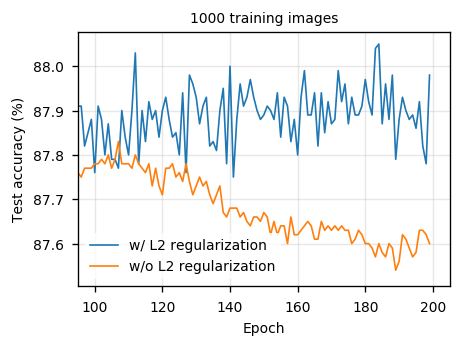

In [26]:
# Test accuracy evolution with and without regularization.
acc_test_wo = 100*np.array(history_less.history['val_acc'])

plt.plot(acc_test[200:], lw=1, label='w/ L2 regularization')
plt.plot(acc_test_wo[200:], lw=1, label='w/o L2 regularization')
plt.legend(loc='best')
plt.xlim([95,205])
plt.grid(alpha=0.3)
plt.xlabel('Epoch')
plt.ylabel('Test accuracy (%)')
plt.title('1000 training images');

This means that, in principile, with more and more epochs we might get a better and better accuracy. Nonetheless, we are still using much less samples than parameters so it is quite hard to avoid overfitting in this situation.

## Wrapping up
At this point, we have visited most of the core principles and ideas behind neural networks. These kind of systems have been proved to be extremely useful in a large number of tasks but they don't come without their limitations. It is not easy to set a working neural network for most of the real problems and they require a lot of time to tune and train. Sometimes even days or months. Also, the more complex the problem we want to solve, the more data we need. Moreover, they usually generalize really bad across problems. That is, a neural network that can be trained to recognize digits extremely well might prove totally useless when trying to train it to recognize a cat.

### Towards a premium KVN
Here we have seen a simple network architecture constituted by an input layer, a single fully-connected hidden layer and an output layer. These kind of structures are what is called **shallow structures**. In fact, neural networks can have any number of hidden layers. When the networks have many hidden layers we talk about **deep neural networks**. Deep neural networks are generally more powerful than shallow ones. Additionally, not only the number of hidden layers may vary but also the layer type. That is, fully-connected layers are only an example. There are many different kind of layers with different properties and uses. Usually, different types are combined in a single neural network. With a deep neural network finely built and tuned we might get a premium KVN with accuracies much better than our $96 \%$.

The field that deals with these deep neural networks, studies them and try to use them to solve problems is what is known as **deep learning**. Although deep neural networks can be amazingly useful, they can be extremely complex, contain a lot of parameters and hyper-parameters and it might be extremely hard to tune them. That is why deep learning is often referred as an art. There are no rules of what works and what doesn't and why yet.

Deep learning is a huge field but most of the ideas discussed here with KVN and Margaret hold for more complex problems. A good resource to delve deeper into such ideas and beyond can be found [here](http://neuralnetworksanddeeplearning.com/). In fact, some of the *arbitrary* chosen hyper-parameters were drawn from this resource.

I very much hope that you enjoyed this article and that you learned something from it! Also, all my best wishes for you when you try to set a real neural network.